# <center> INTRODUÇÃO A DATASCIENCE </center> 

#### Fernando A. Correia dos S. Junior <br> João Vitor Chaves de Oliveira

In [1]:
import networkx as nx
import json
import random
import re
import scipy
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
class Graph():
    def __init__(self, file_path, graph_name="grafo-normalizado"):
        self.graph_name = graph_name
        self.graph = self.generateGraph(file_path)
        self.edges = list(self.graph.edges)
        self.nodes = list(self.graph.nodes)
        self.nodes.sort()  # lexicographical order
        self.number_of_edges = len(self.edges)
        self.number_of_nodes = len(self.nodes)
        self.in_degree = {k: self.graph.in_degree(k) for k in self.nodes}
        self.out_degree = {k: self.graph.out_degree(k) for k in self.nodes}
        self.max_out_degree = max(self.out_degree) if self.out_degree else 0
        self.min_out_degree = min(self.out_degree) if self.out_degree else 0
        self.max_in_degree = max(self.in_degree) if self.in_degree else 0
        self.min_in_degree = min(self.in_degree) if self.in_degree else 0

        self.density = self.number_of_edges / (self.number_of_nodes * (self.number_of_nodes - 1))
#         self.triangles = nx.triangles(self.graph)  # not implemented for directed type
        
        # measures centrality based
        self.centralities = nx.algorithms.degree_centrality(self.graph)
        self.betweenness = nx.algorithms.betweenness_centrality(self.graph)
        self.closeness = nx.algorithms.closeness_centrality(self.graph)
        self.eigenvector = nx.algorithms.eigenvector_centrality_numpy(self.graph)

        self.hubs, self.authorities = nx.hits_numpy(self.graph)
        self.reciprocity = nx.algorithms.reciprocity(self.graph)
    
    def reciprocity_for(self, node):
        return nx.algorithms.reciprocity(self.graph, node)
    
    def convert_to_dataframe(self):
        data = []
        for node in self.nodes:
            item = {
                "node": node,
                "in": self.in_degree[node],
                "out": self.out_degree[node],
                "centrality": self.centralities[node],
                "betweeness": self.betweenness[node],
                "closeness": self.closeness[node],
                "eigenvector": self.eigenvector[node],
                "hub": self.hubs[node],
                "authority": self.authorities[node],
            }
            data.append(item)
        return pd.DataFrame(data, columns=["node", "in", "out", "centrality", "betweeness", "closeness",
                                           "eigenvector", "hub", "authority"])
            

    def generateGraph(self, file_path):
        g = nx.DiGraph()
        graph_json = json.load(open(file_path)) 
        keys = graph_json.keys()
        for i in keys:
            values = graph_json[i]
            for j in values:
                g.add_edge(i,j)
        return g

    def saveGraph(self):
        nx.write_graphml(self.graph, path='%s.graphml' % self.graph_name)
    
    def showGraph(self): #plota o grafo mas não fica tão legal 
        plt.figure(figsize=(10, 10))
        nx.draw(self.graph, node_size=20, linewidths=1, node_color='blue', font_size=8)
        plt.axis('equal')
        plt.show()

#     ## graph cohesion
#     def number_of_cliques(self, v=4):
#         pass
    
#     def ego_for(self, v):
#         # the densenty of the subgraph witout v
#         pass

#     def degree_distribuition(self, title_year = ''):
#         din = self.max_degree('in')
#         dout = self.max_degree('out')
#         MaxDegree = max(din,dout)
#         values = np.zeros([MaxDegree+1,2])
        
#         for i in range(MaxDegree+1):
#             values[i][0] = len(self.in_degree(i))
#             values[i][1] = len(self.out_degree(i))
#         df = pd.DataFrame(values,columns=['Grau de entrada','Grau de Saída'])
#         p = df.plot.bar()
#         p.set_xlabel(u'Grau')
#         p.set_ylabel(u'Número de vértices')
#         p.set_title(u"Número de vértices por grau "+title_year)


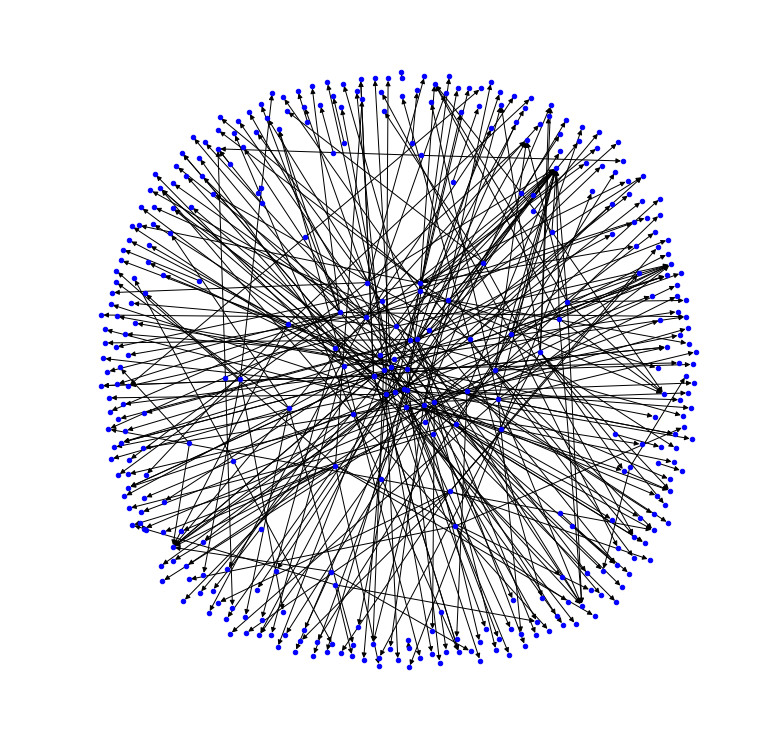

In [6]:
G = Graph("janelas/aborto/aborto_citation_map.json")
G.showGraph()

## Geração de DataFrames para cada janela de dois anos

In [ ]:
for x in range(2007, 2019, 2):
    G = Graph("janelas/grafo_completo/dois_anos/normalizado_citation_map_%s-%s.json" % (x, x+1))
    df = G.convert_to_dataframe()
    df.to_csv("dataframe/grafo_completo/grafo_%s-%s.csv" % (x, x+1))

In [75]:
df = pd.read_csv("dataframe/grafo_completo/grafo_2005-2006.csv")

In [76]:
df

,Unnamed: 0,node,in,out,centrality,betweeness,closeness,eigenvector,hub,authority
0,0,adc 12 stf,1,0,0.022222,0.0,0.022222,2.429441e-01,0.0,0.000000
1,1,adi 3484 stf,0,2,0.044444,0.0,0.000000,2.362168e-10,0.0,0.000000
2,2,adi 3614 stf,0,2,0.044444,0.0,0.000000,-8.749045e-11,0.0,0.000000
3,3,adi 3660 stf,0,1,0.022222,0.0,0.000000,2.587004e-11,0.0,0.000000
4,4,adi 3677 stf,0,1,0.022222,0.0,0.000000,1.673116e-11,0.0,0.000000
5,5,adpf 33 stf,1,0,0.022222,0.0,0.022222,-1.179571e-01,0.0,0.000000
6,6,adpf 46 stf,1,0,0.022222,0.0,0.022222,-1.179571e-01,0.0,0.000000
7,7,adpf 54 stf,2,0,0.044444,0.0,0.044444,7.627550e-02,0.0,0.000000
8,8,adpf 79 stf,0,9,0.200000,0.0,0.000000,-1.146908e-10,0.0,0.000000
9,9,ai 542358 stf,0,1,0.022222,0.0,0.000000,-9.426417e-11,0.0,0.000000
